In [35]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [36]:
mp_key = "VGJDyi0TH2uezP850Utn6gEwHnI5i365"
mp_id = "mp-961713" #ZrSnPt
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Diffractogramme pour un rayonnement X incident CuKα de longueur d’onde λ=1.54060 Å

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

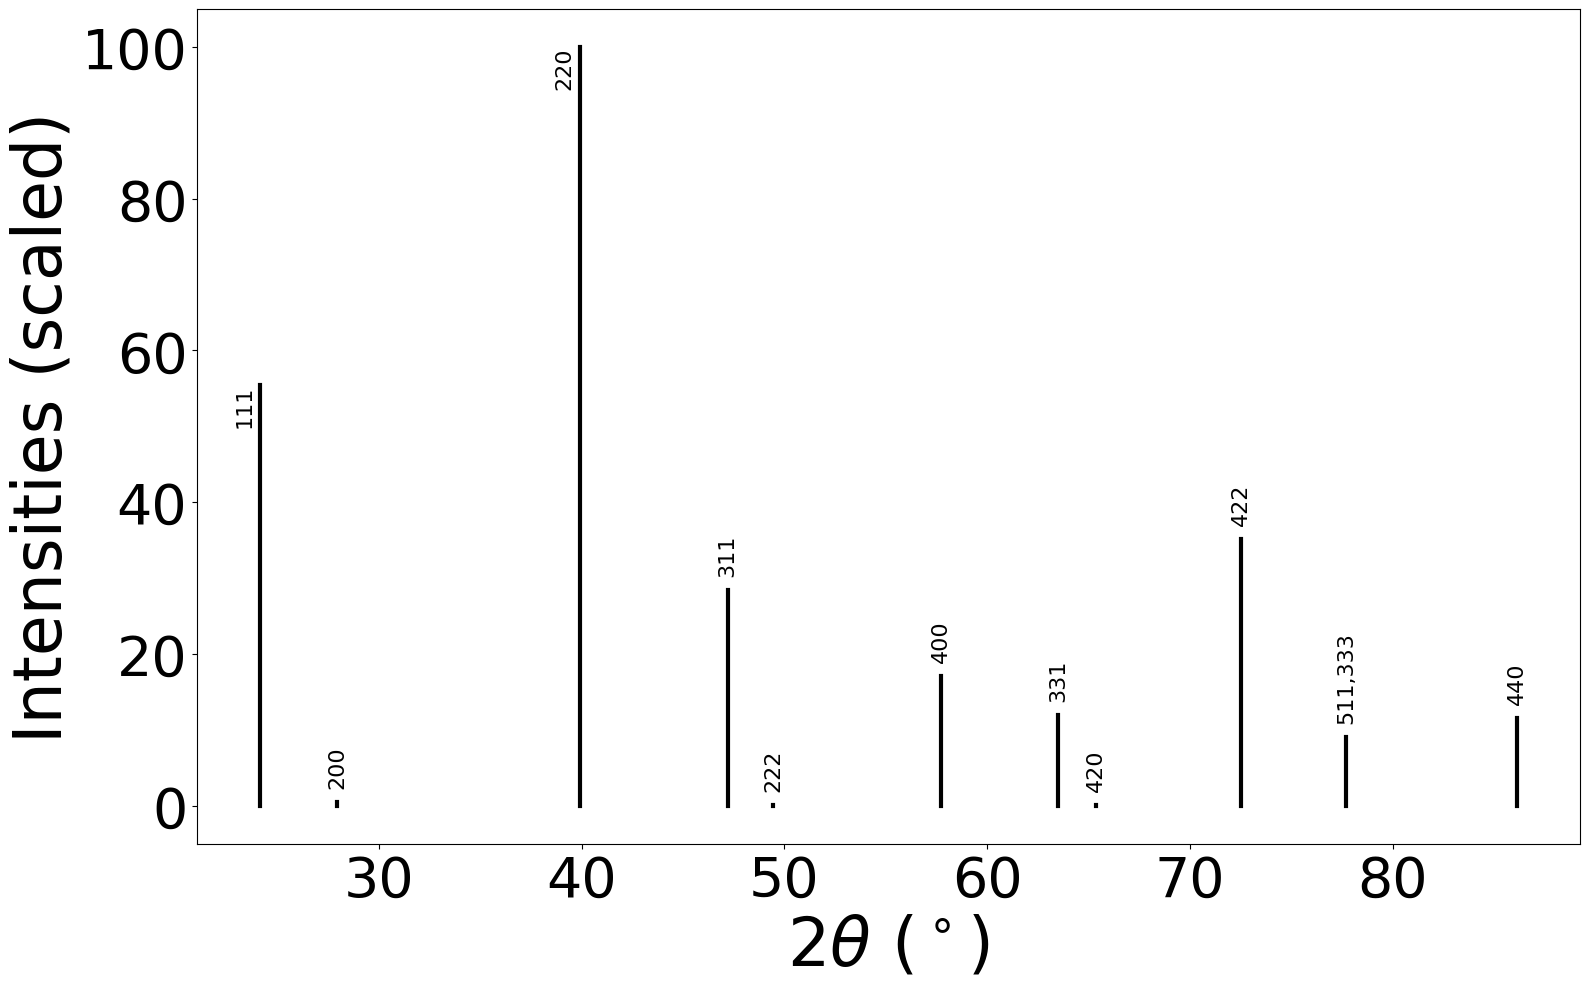

In [37]:
XrdC = XRDCalculator('CuKa1',1.54060)
pattern = XrdC.get_pattern(prim_struc)
XrdC.get_plot(prim_struc)

## 3 premiers pics du diffractogramme

In [38]:
for i in range(0,3):
    theta = pattern.x[i]
    intensity = pattern.y[i]
    hkl = pattern.hkls[i][0].get("hkl")
    multiplicity = pattern.hkls[i][0].get("multiplicity")
    distance = pattern.d_hkls[i]

    print("\n")
    print("\033[1m" + "    Pic " + str(i+1) + " :" + "\033[0m")
    print("\n")
    print("   "+"    Angle 2θ : " + str(theta) +"°")
    print("   "+"    Intensité : " +str(intensity) )
    print("   "+"    Indices hkl : " + str(hkl) +" (multiplicité = " + str(multiplicity)+")")
    print("   "+"    Distance interplanaire :"+ str(distance)+" Å")
    print("\n")
    print('-' * 60)
    
   



    Pic 1 :


       Angle 2θ : 24.137503153187208°
       Intensité : 55.49908423407869
       Indices hkl : (1, 1, 1) (multiplicité = 8)
       Distance interplanaire :3.6840473482696803 Å


------------------------------------------------------------


    Pic 2 :


       Angle 2θ : 27.94201289338676°
       Intensité : 0.4749215899952037
       Indices hkl : (2, 0, 0) (multiplicité = 6)
       Distance interplanaire :3.1904785923462398 Å


------------------------------------------------------------


    Pic 3 :


       Angle 2θ : 39.92862803574442°
       Intensité : 100.0
       Indices hkl : (2, 2, 0) (multiplicité = 12)
       Distance interplanaire :2.256009047878537 Å


------------------------------------------------------------


La maille du ZrSnPt est cubique faces centrées donc hkl répond aux conditions de présence des pics qui sont : h + k = 2n, h + l = 2o, k + l = 2p. 
2 theta équivaut à l'angle entre la direction d'incidence et celle d'observation, il est calculable par la loi de Bragg.